In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import importlib
import functions
import numpy as np
import json
#import seaborn as sns

importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Lenovo\\Documents\\Études\\Ecole_Ingénieur\\2A\\TR-Economie\\Projet_de_recherche\\analysingEffectOfHealthPlanInFrance\\code\\functions.py'>

In [3]:
from functions import gov_exp_dental

In [72]:
elements = os.listdir("../Open-CCAM-data")
unique_values = []

for i in range(len(elements)-1):
    if (i+2015) in [2015, 2016, 2017, 2018, 2019]:
        df=pd.read_excel(f'../Open-CCAM-data/{i+2015}_CCAM.xls', sheet_name=1)
    else:
        df=pd.read_excel(f'../Open-CCAM-data/{i+2015}_CCAM.xlsx', sheet_name=1)

    print(i+2015)
    values = df["Libellé long"].unique().tolist()
    for value in values:
        if value in unique_values:
            continue
        else:
            unique_values.append(value)

2015
2016
2017
2018
2019
2020
2021
2022
2023


In [73]:
print(len(unique_values))

8300


In [75]:
df_filter = pd.DataFrame({"libellé" : unique_values})
df_filter

,libellé
0,Exérèse de tumeur intraparenchymateuse du cerv...
1,Exérèse de tumeur intraparenchymateuse du cerv...
2,"Exérèse de lésion du tronc cérébral, par crani..."
3,"Exérèse de lésion du corps calleux, du fornix ..."
4,Résection de parenchyme cérébral pour infarctu...
...,...
8295,Curiethérapie interstitielle à bas débit de do...
8296,Qualification pour analyse de génétique somati...
8297,Qualification pour analyse de génétique somati...
8298,Test de détection de l'acide ribonucléique ou ...


# en gros le dentaire n'a été que changé sur les soins prothétiques (prothèses)
ici je prends tout et ensuite je séparerais

In [ ]:
couronnes_dentoportées = list(df_filter[df_filter["libellé"].str.lower().str.contains("céramique-monolithique", na=False)]["libellé"].unique())

inlays_cores = list(df_filter[df_filter["libellé"].str.lower().str.contains("inlay core", na=False)]["libellé"].unique())

couronnes_transitoires = list(df_filter[df_filter["libellé"].str.lower().str.contains("couronne dentaire transitoire", na=False)]["libellé"].unique())

bridges_metallique = list(df_filter[((df_filter["libellé"].str.lower().str.contains("bridge", na=False)) &
                                         df_filter["libellé"].str.lower().str.contains("métalliques", na=False))]["libellé"].unique())

bridges_ceramometallique = list(df_filter[((df_filter["libellé"].str.lower().str.contains("bridge", na=False)) &
                                         df_filter["libellé"].str.lower().str.contains("céramométalliques", na=False))]["libellé"].unique())

inlay_onlay = list(df_filter[df_filter["libellé"].str.lower().str.contains("inlay-onlay", na=False)]["libellé"].unique())

prothese_adjointes = list(df_filter[df_filter["libellé"].str.lower().str.contains("prothèse amovible", na=False)]
                                         ["libellé"].unique())

prothese_reparations = list(df_filter[df_filter["libellé"].str.lower().str.contains("réparation", na=False) &
                                                   df_filter["libellé"].str.lower().str.contains("prothèse", na=False)
                                                   ]
                                         ["libellé"].unique())

couronnes_implantoportées = list(df_filter[df_filter["libellé"].str.lower().str.contains("couronne dentaire implantoportée", na=False)]["libellé"].unique())



In [ ]:
all = [couronnes_implantoportées, 
       couronnes_dentoportées, 
       couronnes_transitoires, 
       inlays_cores, 
       inlay_onlay, 
       bridges_ceramometallique,
       bridges_metallique,
       prothese_adjointes,
       prothese_reparations]

In [130]:
all_flattened = []
for title in all:
    all_flattened += [value for value in title]

all_flattened

["Pose d'une couronne dentaire implantoportée",
 "Pose d'une couronne dentaire dentoportée céramique-monolithique zircone sur une molaire",
 "Pose d'une couronne dentaire dentoportée céramique-monolithique autre que zircone sur une deuxième prémolaire ou une molaire",
 "Pose d'une couronne dentaire dentoportée céramique-monolithique zircone sur une dent autre qu'une molaire",
 "Pose d'une couronne dentaire dentoportée céramique-monolithique autre que zircone sur une incisive, une canine ou une première prémolaire",
 "Pose d'une couronne dentaire transitoire",
 "Pose d'une couronne dentaire transitoire pour une couronne dentoportée à tarif libre",
 "Pose d'une couronne dentaire transitoire pour couronne dentoportée sans reste à charge",
 "Pose d'une couronne dentaire transitoire pour une couronne dentoportée à entente directe limitée",
 "Pose d'une couronne dentaire transitoire unitaire sur implant ou sur pilier de bridge dento-porté ou implantoporté",
 "Pose d'une infrastructure corono

In [134]:
df = pd.DataFrame({
    "Panier100%" : "",
    "Panier de soins 'reste à charge modéré'" : "",
    "Panier de soins aux tarifs libres" : "",
    "all" : all_flattened
})

In [ ]:
df.to_excel("dental_titles_vierge.xlsx")

In [ ]:
df = pd.read_excel("dental_titles.xlsx", index_col=0)
df = df.fillna(0)
to_keep = list(df[df["Panier100%"]==1]["all"].unique())

---------------------------------

**Titles :**

1st level : "Catégorie d'acte"

2nd level : "Sous-catégorie d'acte"

3rd level : "Libellé long"

In [5]:
df = pd.read_excel('../Open-CCAM-data/2015_CCAM.xls', sheet_name=1)

In [6]:
df.columns

Index(['Code Acte', 'Code acte/activité/phase', 'Libellé long',
       'Code Activité', 'Code Phase', 'Code Regroupement',
       'Tarif secteur 1 et 2 adhérant au CAS',
       'Tarif secteur 2 non adhérant au CAS', 'Quantité d actes en 2015',
       'HSD 2015', 'Montants remboursés 2015', 'Catégorie d'acte',
       'Sous-catégorie d'acte'],
      dtype='object')

In [7]:
elements = os.listdir("../Open-CCAM-data")
unique_values = []

for i in range(len(elements)):
    if (i+2015) in [2015, 2016, 2017, 2018, 2019]:
        df=pd.read_excel(f'../Open-CCAM-data/{i+2015}_CCAM.xls', sheet_name=1)
    else:
        df=pd.read_excel(f'../Open-CCAM-data/{i+2015}_CCAM.xlsx', sheet_name=1)

    print(len(df.columns))

13
13
13
13
13
13
13
13
13


In [8]:
df.columns

Index(['Code Acte', 'Code acte/activité/phase', 'Libellé long',
       'Code Activité', 'Code Phase', 'Code regroupement',
       'Tarif secteur 1 et 2 adhérant à l'OPTAM/OPTAM-CO',
       'Tarif secteur 2 non adhérant à l'OPTAM/OPTAM-CO', 'Quantité d'actes ',
       'Base de remboursement ', 'Montants remboursés', 'Catégorie d'acte',
       'Sous-catégorie d'acte'],
      dtype='object')

In [9]:
def gov_exp_dental(cent_santé=False):
    elements = os.listdir("../Open-CCAM-data")
    unique_values = []

    expenditures = {}
    #nb_LPP_codes = {}
    nb_refunds = {}
    refund_rate = {}
    base = {}

    for i in range(len(elements)):
        if (i+2015) in [2015, 2016, 2017, 2018, 2019]:
            df=pd.read_excel(f'../Open-CCAM-data/{i+2015}_CCAM.xls', sheet_name=1)
        else:
            df=pd.read_excel(f'../Open-CCAM-data/{i+2015}_CCAM.xlsx', sheet_name=1)

        print(i+2015)
        
        if cent_santé == True:
            mask = df["Libellé long"].isin(to_keep)
            df = df[mask]

        df = pd.DataFrame(
            {
                "Complet": df.iloc[:, 2],
                "Lib. long" : df.iloc[:,1],
                #"Cat. acte": df.iloc[:, -2],
                #"Sous-cat. acte": df.iloc[:, -1],
                "QTE": df.iloc[:, -5],
                "REM": df.iloc[:, -3],
                "BSE": df.iloc[:, -4],
            }
        )
        
        df.reset_index(inplace=True)
        df.drop(columns="index", inplace=True)
        df = df.dropna()
        df = df.reset_index(drop=True)

        key = str(i+2015)
        
        sum = df["REM"].sum()
        base_sum = df["BSE"].sum()

        expenditures[key] = sum
        base[key] = base_sum

        rate = []
        if len(df) == 0:
            refund_rate[key] = 0
        else:
            for i in range(len(df)):
                if (
                    pd.isna(df.loc[i, "REM"])
                    or pd.isna(df.loc[i, "BSE"])
                    or df.loc[i, "BSE"] == 0
                ):
                    continue
                else:
                    rate.append(df.loc[i, "REM"] / df.loc[i, "BSE"])
            refund_rate[key] = np.mean(rate)
        # print(f"key : {key}")

        #nb_LPP_codes[key] = len(df["CODE_LPP"].unique().tolist())
        nb_refunds[key] = df["QTE"].sum()

    return [expenditures, nb_refunds, refund_rate, base]

In [147]:
dental = gov_exp_dental(cent_santé=False)

2015
2016
2017
2018
2019
2020
2021
2022
2023


In [148]:
dental[0]

{'2015': 10909824975.875534,
 '2016': 11318314364.488632,
 '2017': 11565804446.1802,
 '2018': 12014747695.641235,
 '2019': 12351962311.423824,
 '2020': 11520019413.8214,
 '2021': 13421840471.20073,
 '2022': 13687480485.679054,
 '2023': 14484073792.003967}

In [149]:
#manque 600M par rapport aux chiffres de la drees (pr 2023 et 2022, pas fait les autres)

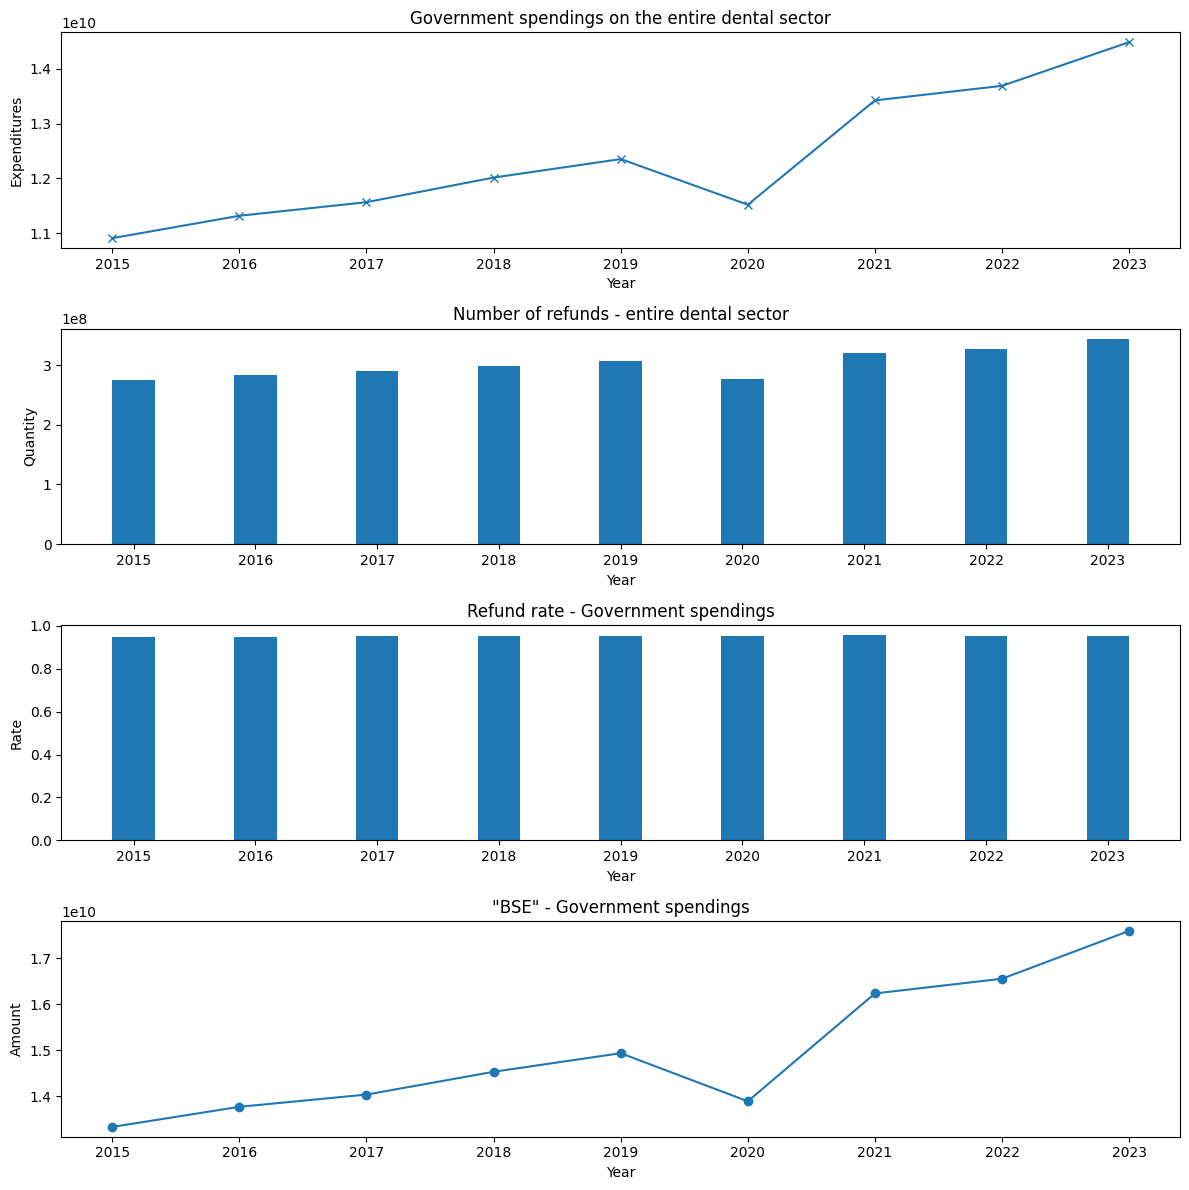

In [150]:
width = 0.35
list_years = [year for year in dental[0]]
fig, axes = plt.subplots(4, 1, figsize=(12, 12))
axes = axes.flatten()

axes[0].plot(list_years, dental[0].values(), color="#1f77b4", marker="x")
axes[0].set_title(
    f"Government spendings on the entire dental sector"
)
axes[0].set_ylabel("Expenditures")

axes[1].bar(list_years, dental[1].values(), width=width, color="#1f77b4")
axes[1].set_title(f"Number of refunds - entire dental sector")
axes[1].set_ylabel("Quantity")

axes[2].bar(list_years, dental[2].values(), color="#1f77b4", width=width)
axes[2].set_title(f"Refund rate - Government spendings")
axes[2].set_ylabel("Rate")

axes[3].plot(list_years, dental[3].values(), color="#1f77b4", marker="o")
axes[3].set_title(f'"BSE" - Government spendings')
axes[3].set_ylabel("Amount")

for i in range(len(axes)):

    axes[i].set_xlabel("Year")
    axes[i].set_xticks(list_years)

plt.tight_layout()
plt.show()

In [240]:
#unique_values

In [10]:
df = pd.read_excel("dental_titles.xlsx", index_col=0, sheet_name=0)
df = df.fillna(0)
to_keep = list(df[df["Panier100%"]==1]["all"].unique())

In [9]:
#recherche du pic en 2019
recherche = pd.read_excel("../Open-CCAM-data/2019_CCAM.xls", sheet_name=1)
recherche = pd.concat([recherche["Libellé long"], recherche["Montants remboursés"]], axis=1)
recherche["Montants remboursés"] -= 150305906
recherche["Montants remboursés"] = abs(recherche["Montants remboursés"])
min(recherche["Montants remboursés"])

recherche[recherche["Montants remboursés"]==min(recherche["Montants remboursés"])]["Libellé long"]

4878    Restauration d'une dent d'un secteur prémolomo...
Name: Libellé long, dtype: object

In [7]:
#to_keep = ["Pose d'une couronne dentaire dentoportée céramométallique ou en équivalents minéraux", "Pose d'une couronne dentaire dentoportée céramométallique sur une incisive, une canine ou une première prémolaire", "Pose d'une couronne dentaire dentoportée en alliage non précieux"]

In [15]:
dental_cent = gov_exp_dental(cent_santé=True, to_keep=to_keep)

In [16]:
dental_cent[0]

{'2015': 942153535.0543488,
 '2016': 958887855.2785015,
 '2017': 960577201.3185228,
 '2018': 1041483786.4385223,
 '2019': 873987114.599595,
 '2020': 883295478.3399956,
 '2021': 1113581801.500007,
 '2022': 1120383325.179998,
 '2023': 1122418365.1999922}

In [17]:
dental_cent[0]["2018"] - dental_cent[0]["2019"]

167496671.8389274

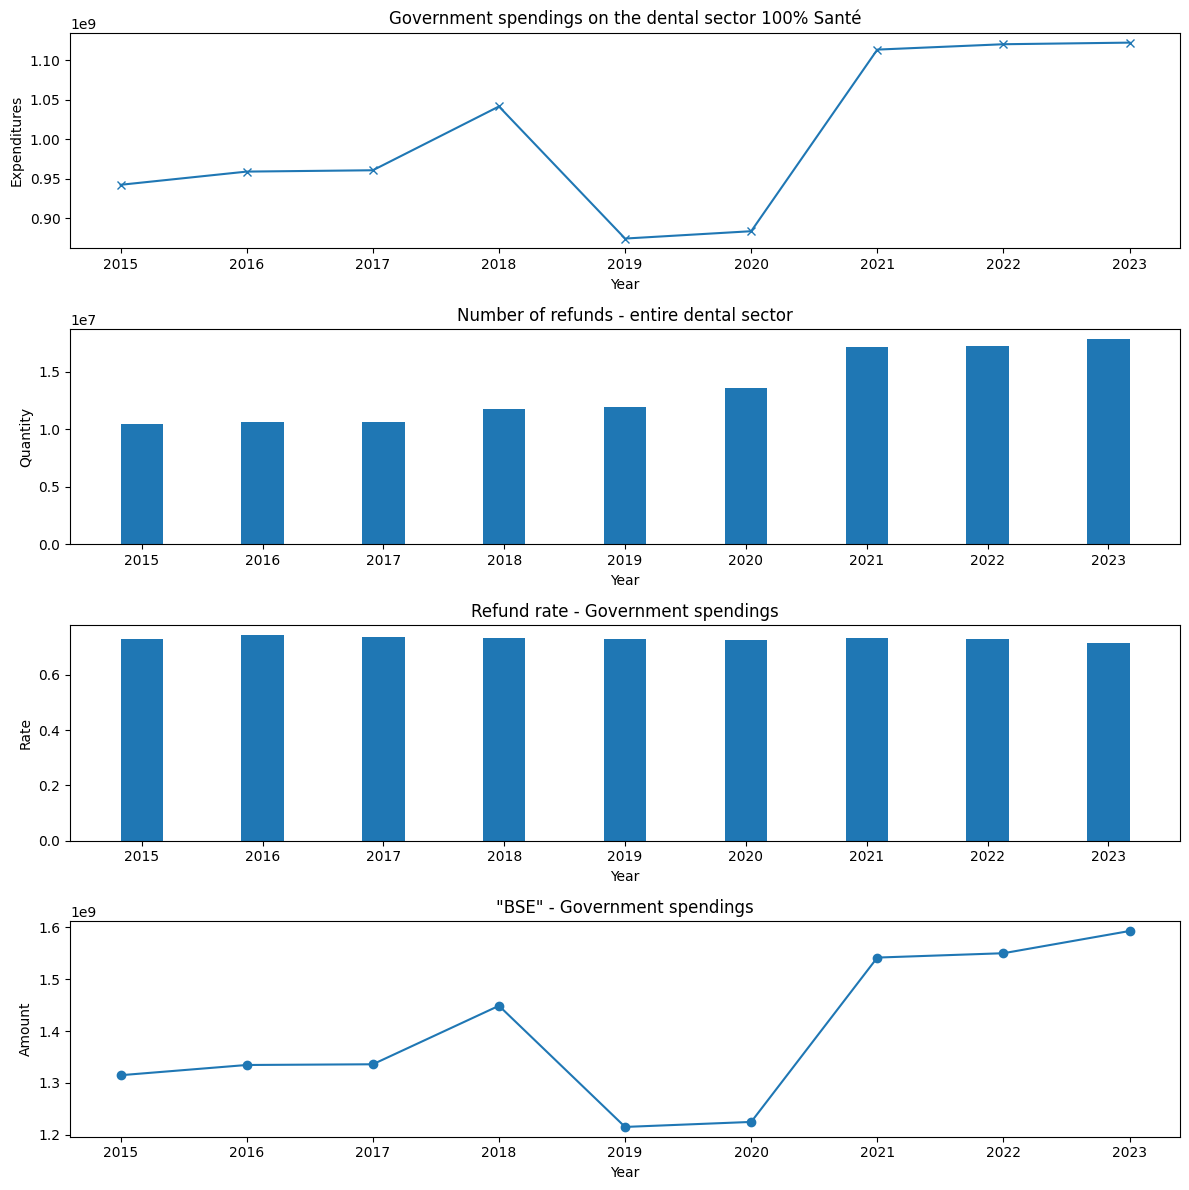

In [18]:
width = 0.35
list_years = [year for year in dental_cent[0]]
fig, axes = plt.subplots(4, 1, figsize=(12, 12))
axes = axes.flatten()

axes[0].plot(list_years, list(dental_cent[0].values()), color="#1f77b4", marker="x")
axes[0].set_title(
    f"Government spendings on the dental sector 100% Santé"
)
axes[0].set_ylabel("Expenditures")

axes[1].bar(list_years, dental_cent[1].values(), width=width, color="#1f77b4")
axes[1].set_title(f"Number of refunds - entire dental sector")
axes[1].set_ylabel("Quantity")

axes[2].bar(list_years, dental_cent[2].values(), color="#1f77b4", width=width)
axes[2].set_title(f"Refund rate - Government spendings")
axes[2].set_ylabel("Rate")

axes[3].plot(list_years, dental_cent[3].values(), color="#1f77b4", marker="o")
axes[3].set_title(f'"BSE" - Government spendings')
axes[3].set_ylabel("Amount")

for i in range(len(axes)):

    axes[i].set_xlabel("Year")
    axes[i].set_xticks(list_years)

plt.tight_layout()
plt.show()

In [14]:
dental_cent_qte = dental_cent[1]
dental_cent_qte

{'2015': 4409420.304568527,
 '2016': 4437470,
 '2017': 4401188,
 '2018': 4689734,
 '2019': 4396736,
 '2020': 5953657,
 '2021': 8045939,
 '2022': 8247546,
 '2023': 8646401}

In [43]:
nocentsante = list(dental[0].values())
nocentsante

NameError: name 'dental' is not defined

In [ ]:
nocentsantedict = {}
i = 0
for year, value in dental_cent[0].items():
    nocentsante[i] = nocentsante[i] - value
    nocentsantedict[year] = nocentsante[i]
    i+=1

In [ ]:
nocentsantedict

{'2015': 10158230318.009003,
 '2016': 10560624705.080133,
 '2017': 10810865820.661682,
 '2018': 11191528489.982721,
 '2019': 11848007446.80423,
 '2020': 11030952097.001402,
 '2021': 12782144840.050722,
 '2022': 13053733962.949057,
 '2023': 13856949013.013979}

In [ ]:
# test tous les codes que j'avais save

In [ ]:
df = pd.read_excel("dental_titles.xlsx", index_col=0, sheet_name=0)
df = df.fillna(0)
to_keep = list(df["all"].unique())

In [ ]:
dental_entire = gov_exp_dental(cent_santé=True)

2015
2016
2017
2018
2019
2020
2021
2022
2023


In [ ]:
dental_entire[0]

{'2015': 942153535.0543488,
 '2016': 958887855.2785015,
 '2017': 960577201.3185228,
 '2018': 1041483786.4385223,
 '2019': 873987114.599595,
 '2020': 883295478.3399956,
 '2021': 1113581801.500007,
 '2022': 1120383325.179998,
 '2023': 1122418365.1999922}

In [ ]:
dental_entire_list = list(dental_entire[0].values())
dental_entire_list

[942153535.0543488,
 958887855.2785015,
 960577201.3185228,
 1041483786.4385223,
 873987114.599595,
 883295478.3399956,
 1113581801.500007,
 1120383325.179998,
 1122418365.1999922]

In [ ]:
dental_nocent_dict = {}
i = 0
for year, value in dental_cent[0].items():
    dental_entire_list[i] = dental_entire_list[i] - value
    dental_nocent_dict[year] = dental_entire_list[i]
    i+=1

In [ ]:
dental_nocent_dict

{'2015': 190558877.18781793,
 '2016': 201198195.87000227,
 '2017': 205638575.8000039,
 '2018': 218264580.7800082,
 '2019': 370032249.98000014,
 '2020': 394228161.51999724,
 '2021': 473886170.3499993,
 '2022': 486636802.45000076,
 '2023': 495293586.2100043}